# LUMPREM 

In [1]:
import lumpyrem as lr
import os

In [2]:
# set the workspace directory
cwd = os.getcwd()
workspace = os.path.join(cwd,'workspace')

# initiate the model and write the in files
b = lr.lumprem.Model(model_name='def', workspace=workspace)
b.write_model()

# run themodel
b.run_model()

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_def.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_def.in read ok.
 - file lr_def.out written ok.



In [3]:
# get model results
results = b.get_results()
results.head()

,days,volume,vol_drain,vol_macro,delta_vol,del_vol_drain,del_vol_macro,rainfall,irrigation,recharge,...,ks,M,L,mflowmax,offset,factor1,factor2,power,vol,workspace
0,0.0,0.25,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.1,0.5,0.5,0.1,0.0,1.0,1.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...
1,1.0,0.25,0.001269,0.0,0.0,0.001269,0.0,0.0000,0.001475,0.0,...,0.1,0.5,0.5,0.1,0.0,1.0,1.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...
2,2.0,0.25,0.002538,0.0,0.0,0.001269,0.0,0.0000,0.001465,0.0,...,0.1,0.5,0.5,0.1,0.0,1.0,1.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...
3,3.0,0.25,0.003808,0.0,0.0,0.001269,0.0,0.0002,0.001265,0.0,...,0.1,0.5,0.5,0.1,0.0,1.0,1.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...
4,4.0,0.25,0.005077,0.0,0.0,0.001269,0.0,0.0002,0.001275,0.0,...,0.1,0.5,0.5,0.1,0.0,1.0,1.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...


In [4]:
# write an irrigation file
b.write_irigfile(3650, 150, 0.3) # number of days, day on which irrigation starts, and fraction of the year with irrigation

Irrigation input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\irrig.in


In [5]:
# write an irrigation file for a specified start date

b.write_irigfile(3650, 150, 0.3, date_start='01/01/2010', irrigfile='irrig_dates.in')

Irrigation input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\irrig_dates.in


LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_ghj.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_ghj.in read ok.
 - file lr_ghj.out written ok.



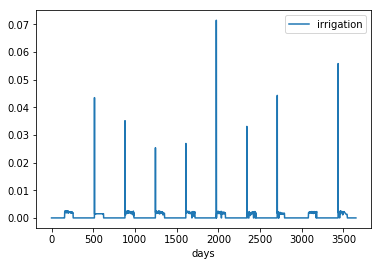

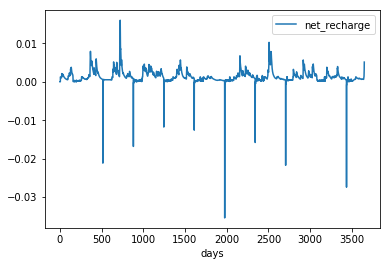

In [9]:
# make a model with an irrig in file
c = lr.lumprem.Model('ghj', workspace=workspace)
c.irrigfile = 'irrig_dates.in'

c.write_model(numdays=3650)
c.run_model()
results = c.get_results()
results.plot('days','irrigation')
results.plot('days', 'net_recharge')

In [7]:
# see the names of columns in the LUMPREM output file
results.columns

Index(['days', 'volume', 'vol_drain', 'vol_macro', 'delta_vol',
       'del_vol_drain', 'del_vol_macro', 'rainfall', 'irrigation', 'recharge',
       'macro_rech', 'total_rech', 'gw_withdrawal', 'net_recharge', 'runoff',
       'pot_evap', 'evaporation', 'gw_pot_evap', 'balance', 'elevation',
       'depth-to-water', 'lumprem_model_name', 'rainfile', 'epotfile',
       'vegfile', 'irrigfile', 'maxvol', 'irrigvolfrac', 'rdelay', 'mdelay',
       'ks', 'M', 'L', 'mflowmax', 'offset', 'factor1', 'factor2', 'power',
       'vol', 'workspace'],
      dtype='object')

# Using LR2SERIES
## Generates MODFLOW6 timeseries file from several LUMPREM model outputs

In [8]:
# make a mf6 tseries file

# run some LUMPREM models. These have to have the same time configuration.
d = lr.lumprem.Model(model_name='abc', workspace=workspace)
d.write_model()
d.run_model()

e = lr.lumprem.Model(model_name='def', workspace=workspace)
e.write_model()
e.run_model()

# make a list of the lumprem models
lr_models =[d,e]

# make a list of lumprem output columns to read
lumprem_ouput_cols = ['net_recharge','gw_withdrawal']

# make a list of timseries names for the column to be used in the ts file. Length and sequence of ts_names and lumprem columns must match!
ts_names = ['rech','pumping']

#initialize the timeseries object
rechts = lr.lr2series.TimeSeries('rech.ts',workspace=workspace, lr_models=lr_models, lumprem_ouput_cols=lumprem_ouput_cols, ts_names=ts_names)

# write lr2series input and ts file
rechts.write_ts()

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_abc.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_abc.in read ok.
 - file lr_abc.out written ok.

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_def.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_def.in read ok.
 - file lr_def.out written ok.

MF6 timeseries file c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\rech.ts.in written to:
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\rech.ts.in
 Enter name of LR2SERIES control file:  
 - reading file rech.ts.in...
 
 - reading LUMPREM2 output file lr_abc.out...
 - file lr_abc.out read ok.
 - reading LUMPREM2 output file lr_def.out...
 - file lr_def.out read ok.
 - writing file rech.ts...
 - file rech.ts written ok.
 
 - file rech.ts.in read ok.

